# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [18]:
import pandas as pd #type: ignore
import numpy as np  #type: ignore
import seaborn as sns   #type: ignore
import matplotlib.pyplot as plt #type: ignore

In [19]:
# Load dataset
file="Online Retail.xlsx"
df = pd.read_excel(file)

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## 2. Data Cleaning


In [22]:
# Drop missing CustomerID values
df.dropna(subset=['CustomerID'], inplace=True)

In [23]:
# Remove canceled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [24]:
# Remove rows with Quantity <= 0 or UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [25]:
# Add TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [26]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [27]:
# Extract new time columns
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

## 3. Basic Statistics

In [28]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,Month,Hour
count,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000,7.612475,12.728202
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000,1.000000,6.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000,5.000000,11.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000,8.000000,13.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000,11.000000,14.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000,12.000000,20.000000
std,179.331775,NaN,22.097877,1713.141560,309.071041,3.416520,2.273519


In [29]:
# Unique customers and countries
print("Unique customers:", df['CustomerID'].nunique())
print("Unique countries:", df['Country'].nunique())

Unique customers: 4338
Unique countries: 37


## 4. Data Visualizations & Analysis

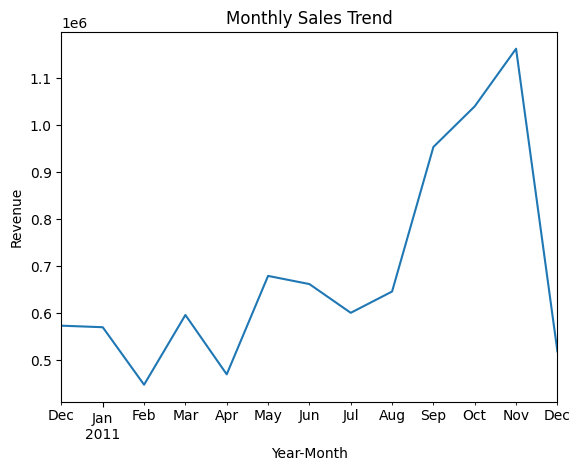

In [30]:
##sales over time
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', xlabel='Year-Month', ylabel='Revenue')
plt.show()

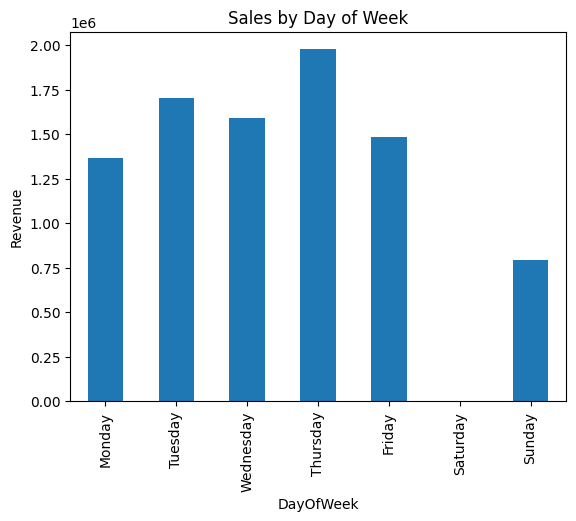

In [31]:
## sales by day of the week

day_sales = df.groupby('DayOfWeek')['TotalPrice'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_sales.plot(kind='bar', title='Sales by Day of Week', ylabel='Revenue')
plt.show()

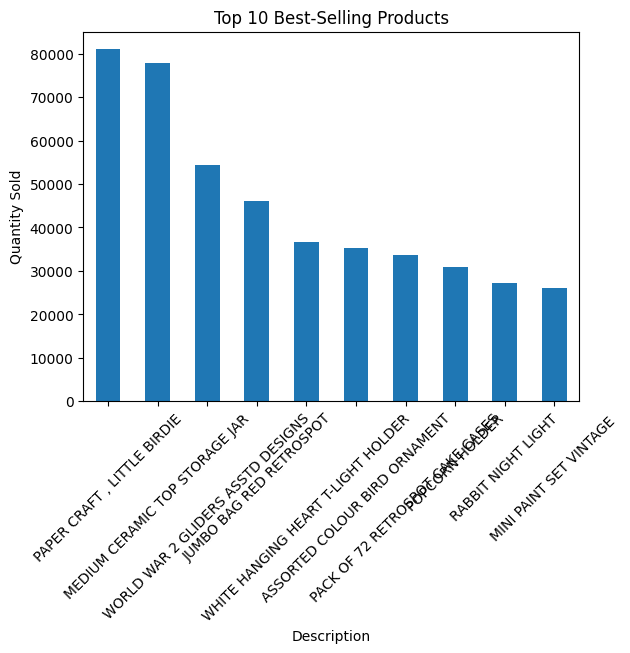

In [32]:
# top 10 products by sales
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Best-Selling Products', ylabel='Quantity Sold')
plt.xticks(rotation=45)
plt.show()

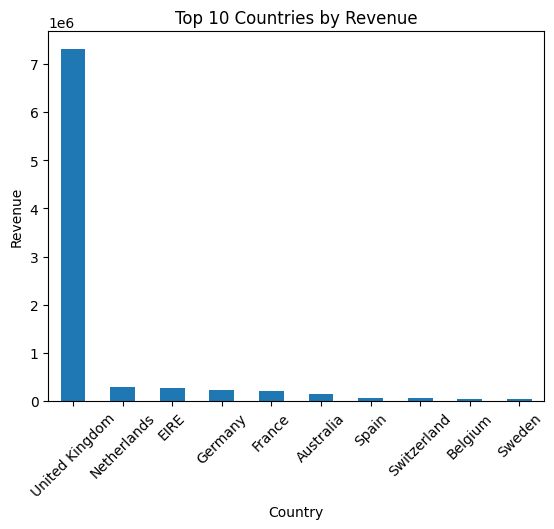

In [33]:
##sales by country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', title='Top 10 Countries by Revenue', ylabel='Revenue')
plt.xticks(rotation=45)
plt.show()

## 5. Outliers and Anomalies

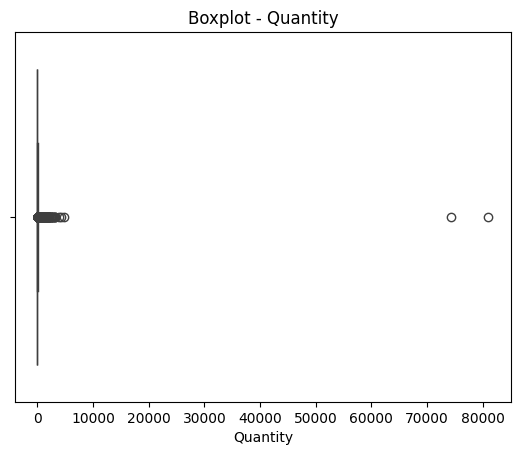

In [36]:
# Boxplot of Quantity
sns.boxplot(x=df['Quantity'])
plt.title("Boxplot - Quantity")
plt.show()


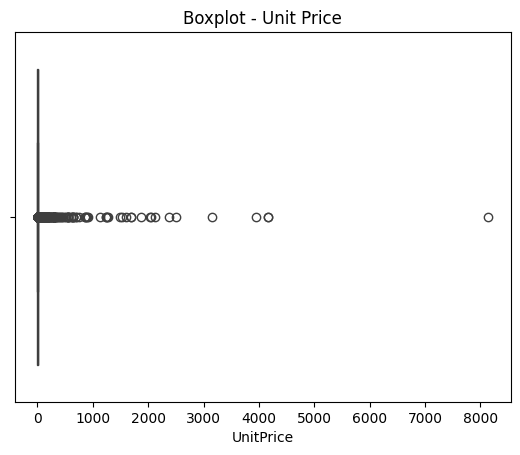

In [35]:
# Boxplot of UnitPrice
sns.boxplot(x=df['UnitPrice'])
plt.title("Boxplot - Unit Price")
plt.show()


## 💡 Overall Business Recommendations
1. Stock more inventory before November to maximize profit during holiday sales.

2. Target promotions during weekdays and mid-day hours for best conversion rates.

3. Segment loyal customers and offer exclusive deals or loyalty rewards.

4. Analyze returns more deeply to reduce product-specific cancellations and improve satisfaction.

5. Expand marketing into non-UK countries with strong existing purchase history.